# Pakistani Dataset Legal Recommendation System EDA

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUKL summer internship/week 2/Supreme Court Data 5.csv')

In [ ]:
df.head()

,Case Files,Label,Category
0,2017 P T D 1481\n[Supreme Court of Pakistan]\n...,Non-Bailable,Against Federation
1,2015 S C M R 365\n[Supreme Court of Pakistan]\...,Bailable,illegal appointments
2,2016 S C M R 1420\n[Supreme Court of Pakistan]...,Bailable,Theft/Fraud
3,2016 S C M R 662\n[Supreme Court of Pakistan]\...,Bailable,Theft/Fraud
4,P L D 2012 Supreme Court 649\nPresent: Mian Sh...,Bailable,illegal appointments


In [ ]:
df['Label'].value_counts()

Bailable        43
Non-Bailable    23
Name: Label, dtype: int64

In [ ]:
df['Category'].value_counts()

illegal appointments     24
Crime                    14
Theft/Fraud              11
Tax evasion               7
Against Federation        5
Islamic Law Violation     4
Theft/fraud               1
Name: Category, dtype: int64

In [ ]:
df.dtypes

Case Files    object
Label         object
Category      object
dtype: object

In [ ]:
df.shape

(66, 3)

In [ ]:
df.describe()

,Case Files,Label,Category
count,66,66,66
unique,66,2,7
top,2019 P L C (C.S.) 67\n[Supreme Court of Pakist...,Bailable,illegal appointments
freq,1,43,24


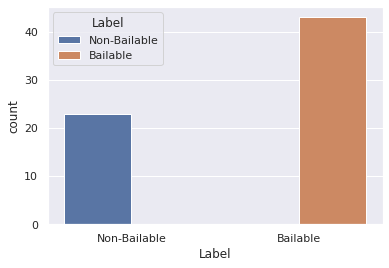

In [ ]:
sns.countplot(x="Label",hue="Label",data=df)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

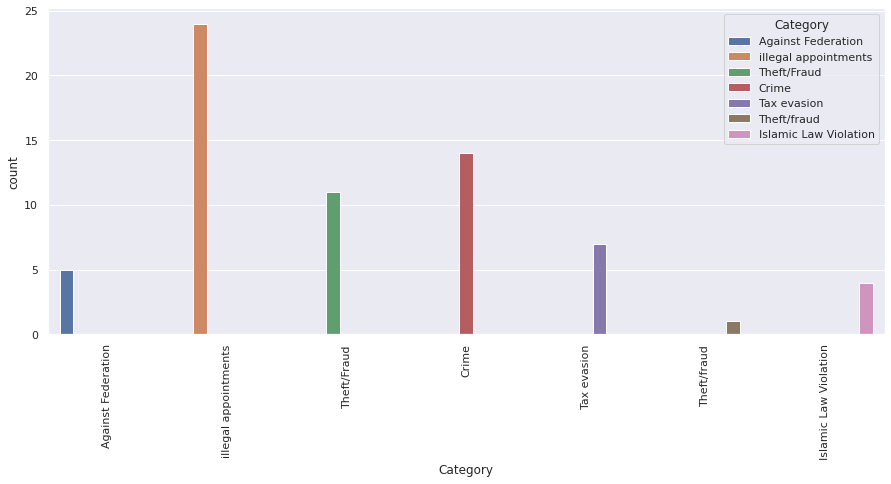

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Category",hue="Category",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

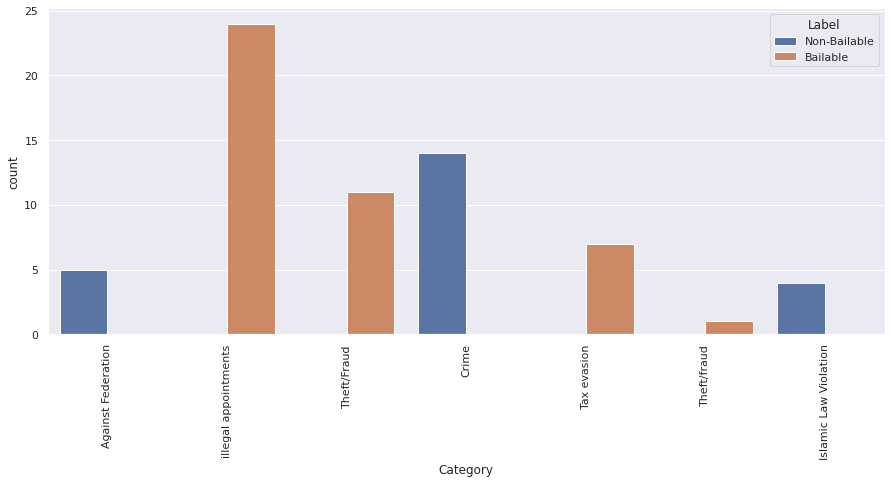

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Category",hue="Label",data=df)
plt.xticks(rotation=90)

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Check if there are any null values
df1 = df[['Case Files','Label']]
df1.isnull().sum()

Case Files    0
Label         0
dtype: int64

In [ ]:
df1.head()

,Case Files,Label
0,2017 P T D 1481\n[Supreme Court of Pakistan]\n...,Non-Bailable
1,2015 S C M R 365\n[Supreme Court of Pakistan]\...,Bailable
2,2016 S C M R 1420\n[Supreme Court of Pakistan]...,Bailable
3,2016 S C M R 662\n[Supreme Court of Pakistan]\...,Bailable
4,P L D 2012 Supreme Court 649\nPresent: Mian Sh...,Bailable


In [ ]:
def cleaning(df, stop_words):

    df['Case Files'] = df['Case Files'].apply(lambda x: ' '.join(x.lower() for x in x.split())) 

                               

    # Replacing the digits/numbers

    df['Case Files'] = df['Case Files'].str.replace('d', '')

            

    # Removing stop words

    df['Case Files'] = df['Case Files'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    #lower casing
    df['Case Files'] = df['Case Files'].str.lower()

    #punctuation removal         
    df["Case Files"] = df["Case Files"].apply(lambda text: remove_punctuation(text))
    # Lemmatization

    df['Case Files'] = df['Case Files'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

            

    return df

stop_words = stopwords.words('english')

df1 = cleaning(df1, stop_words)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [ ]:
df1.head()

,Case Files,Label
0,2017 p 1481 supreme court pakistan present mia...,Non-Bailable
1,2015 c r 365 supreme court pakistan present na...,Bailable
2,2016 c r 1420 supreme court pakistan present a...,Bailable
3,2016 c r 662 supreme court pakistan present an...,Bailable
4,p l 2012 supreme court 649 present mian shakir...,Bailable


In [ ]:
df2 = df1.rename(columns={'Case Files': 'Case_Files'})

In [ ]:
df2.head()

,Case_Files,Label
0,2017 p 1481 supreme court pakistan present mia...,Non-Bailable
1,2015 c r 365 supreme court pakistan present na...,Bailable
2,2016 c r 1420 supreme court pakistan present a...,Bailable
3,2016 c r 662 supreme court pakistan present an...,Bailable
4,p l 2012 supreme court 649 present mian shakir...,Bailable


In [ ]:
df2.Case_Files

0     2017 p 1481 supreme court pakistan present mia...
1     2015 c r 365 supreme court pakistan present na...
2     2016 c r 1420 supreme court pakistan present a...
3     2016 c r 662 supreme court pakistan present an...
4     p l 2012 supreme court 649 present mian shakir...
                            ...                        
61    2016 c r 475 supreme court pakistan present ej...
62    2018 c l 177 supreme court pakistan present ej...
63    2020 c r 465 supreme court pakistan present qa...
64    p l 2017 supreme court 99 present mian saqib n...
65    2017 p l c c 428 supreme court pakistan presen...
Name: Case_Files, Length: 66, dtype: object

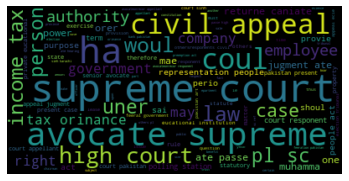

In [ ]:
#visualization the most common words
common_words=''
for i in df2.Case_Files:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
le = LabelEncoder()
le.fit(df2['Label'])
df2['Label'] = le.transform(df2['Label'])

In [ ]:
Y  = np_utils.to_categorical(df2['Label'], 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df2['Case_Files'], Y, test_size = 0.30, random_state = 7, shuffle = True)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (46,)
Shape of X_test (20,)
Shape of Y_train (46, 2)
Shape of Y_test (20, 2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 500
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)


In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim = train_vecs.shape[1]))
model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 34,210
Trainable params: 34,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
learning_rate = 0.001
opt = Adam(lr = learning_rate) 
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'] )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(train_vecs.toarray(), Y_train, epochs = 10, verbose = 1, validation_split = 0.2) 

Epoch 1/10
2/2 [==============================] - 14s 498ms/step - loss: 0.6871 - accuracy: 0.6053 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6753 - accuracy: 0.6343 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 0.6650 - accuracy: 0.6447 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 0.6597 - accuracy: 0.6238 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 30ms/step - loss: 0.6499 - accuracy: 0.6343 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6412 - accuracy: 0.6343 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 21ms/step - loss: 0.6291 - accuracy: 0.6551 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 8/10
2/2 [=========

In [ ]:
df_w2v = df2.copy() 
df_w2v.head()

,Case_Files,Label
0,2017 p 1481 supreme court pakistan present mia...,1
1,2015 c r 365 supreme court pakistan present na...,0
2,2016 c r 1420 supreme court pakistan present a...,0
3,2016 c r 662 supreme court pakistan present an...,0
4,p l 2012 supreme court 649 present mian shakir...,0


In [ ]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["Case_Files"].apply(tokenizer)

In [ ]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], size=128, window=5, workers=10, min_count = 1)

In [ ]:
model_word2vec.wv.most_similar("court")

[('appellant', 0.9998383522033691),
 ('muhamma', 0.9998276233673096),
 ('responents', 0.9997912049293518),
 ('khan', 0.9997751712799072),
 ('no', 0.9997720718383789),
 ('responent', 0.9997621178627014),
 ('avocateonrecor', 0.9997606873512268),
 ('ahme', 0.9997217059135437),
 ('ali', 0.9997215867042542),
 ('hussain', 0.9996932744979858)]

In [ ]:
VOCAB_SIZE = len(model_word2vec.wv.vocab)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [ ]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(6925, 128, 2998)

In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

In [ ]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        pass

In [ ]:
words2vec_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.50810981e-01,  8.00358951e-02,  4.93496537e-01, ...,
        -4.39222425e-01,  2.14107037e-01, -3.51955108e-02],
       [ 1.64504573e-01,  6.94390610e-02,  3.40927869e-01, ...,
        -3.04494500e-01,  1.48072124e-01, -3.85692641e-02],
       ...,
       [ 1.14867161e-03, -1.77854497e-03,  4.04266920e-03, ...,
        -1.64236012e-03,  2.81328242e-03,  1.94775849e-03],
       [-8.05870513e-04, -2.97466991e-03,  6.78615877e-03, ...,
        -4.91143297e-03,  5.05532557e-03, -2.98323506e-03],
       [-9.29496367e-04, -2.74980231e-03,  3.43012973e-03, ...,
         1.25166451e-04,  3.46074579e-03,  1.17668370e-03]])

In [ ]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [ ]:
train_label = df_w2v.Label

In [ ]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [ ]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=False ))

model.add(Layers.Conv1D(512, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(256, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(128, 5, activation="relu"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(64, 3, activation="relu"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(32, 3, activation="relu"))
model.add(Layers.Dropout(0.3))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.6))

model.add(Layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2998, 128)         886528    
_________________________________________________________________
conv1d (Conv1D)              (None, 2994, 512)         328192    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 598, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 594, 256)          655616    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 118, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 114, 128)          163968    
_________________________________________________________________
dropout (Dropout)            (None, 114, 128)          0

In [ ]:
CONV_NET = model.fit( train_sentences, train_tags, epochs=10, validation_split=0.20 )

Epoch 1/10
2/2 [==============================] - 7s 2s/step - loss: 0.7096 - accuracy: 0.4146 - val_loss: 0.6279 - val_accuracy: 0.8182
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 0.6865 - accuracy: 0.4146 - val_loss: 0.5984 - val_accuracy: 0.9091
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 0.6792 - accuracy: 0.5610 - val_loss: 0.6126 - val_accuracy: 0.9091
Epoch 4/10
2/2 [==============================] - 5s 2s/step - loss: 0.8641 - accuracy: 0.5122 - val_loss: 0.7067 - val_accuracy: 0.4545
Epoch 5/10
2/2 [==============================] - 5s 2s/step - loss: 0.7595 - accuracy: 0.5366 - val_loss: 0.7050 - val_accuracy: 0.4545
Epoch 6/10
2/2 [==============================] - 5s 2s/step - loss: 0.6747 - accuracy: 0.5366 - val_loss: 0.6784 - val_accuracy: 0.5455
Epoch 7/10
2/2 [==============================] - 5s 2s/step - loss: 0.6954 - accuracy: 0.4878 - val_loss: 0.6665 - val_accuracy: 0.8182
Epoch 8/10
2/2 [=========================

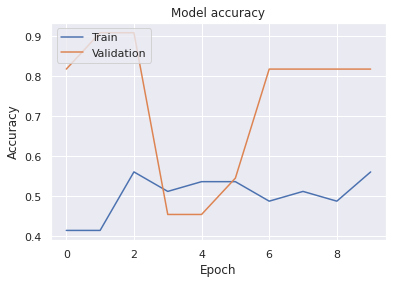

In [ ]:
plt.plot(CONV_NET.history['accuracy'])
plt.plot(CONV_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

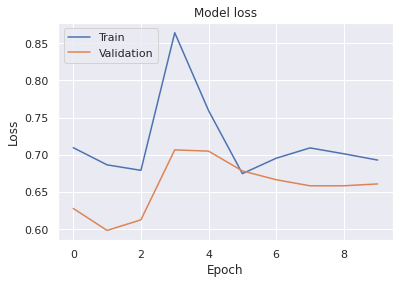

In [ ]:
plt.plot(CONV_NET.history['loss'])
plt.plot(CONV_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(model.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.00      0.00      0.00         0

    accuracy                           0.79        14
   macro avg       0.50      0.39      0.44        14
weighted avg       1.00      0.79      0.88        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2998, 128)         886528    
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               788480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
 

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3) 
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
2/2 [==============================] - 41s 16s/step - loss: 0.6765 - accuracy: 0.5122 - val_loss: 0.4879 - val_accuracy: 0.8182
Epoch 2/10
2/2 [==============================] - 35s 15s/step - loss: 0.7586 - accuracy: 0.5610 - val_loss: 0.5101 - val_accuracy: 0.8182
Epoch 3/10
2/2 [==============================] - 35s 14s/step - loss: 0.7473 - accuracy: 0.5610 - val_loss: 0.5427 - val_accuracy: 0.8182
Epoch 4/10
2/2 [==============================] - 35s 15s/step - loss: 0.7154 - accuracy: 0.5610 - val_loss: 0.5575 - val_accuracy: 0.8182


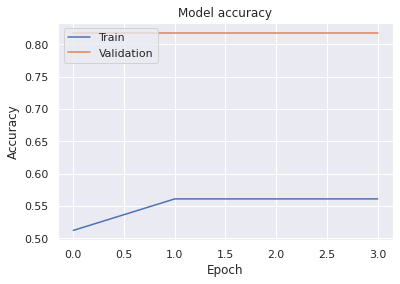

In [ ]:
plt.plot(LSTM_NET.history['accuracy'])
plt.plot(LSTM_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

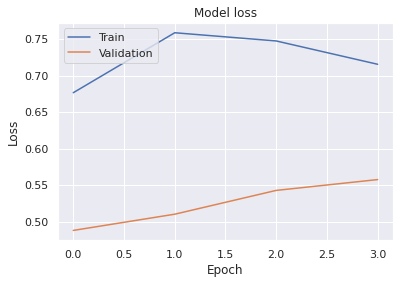

In [ ]:
plt.plot(LSTM_NET.history['loss'])
plt.plot(LSTM_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_sentences,test_tags)

1/1 [==============================] - 1s 642ms/step - loss: 0.6812 - accuracy: 0.7857


[0.6812480688095093, 0.7857142686843872]

In [ ]:
lstm.evaluate(test_sentences,test_tags)

1/1 [==============================] - 3s 3s/step - loss: 0.5868 - accuracy: 0.7857


[0.586795449256897, 0.7857142686843872]